In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc

In [4]:
data='lec1-dataset.csv'
df=pd.read_csv(data,header=None)
print(df)
array=df.values
print(array.shape)

     0  1
0    1  1
1    1  0
2    1  1
3    0  1
4    1  1
..  .. ..
995  0  1
996  1  1
997  1  0
998  0  0
999  1  0

[1000 rows x 2 columns]
(1000, 2)


In [5]:
# actual values
actual = array[:, 0] # 0
# predicted values
predicted = array[:,1] # 1
#print(actual)
#print(predicted)

In [6]:
# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)
  # balanced data set
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('TP =', tp)
print('FN =', fn)
print('FP =', fp)
print('TN =', tn)

accuracy=(tp+tn)/(tp+tn+fp+fn)
error_rate=(fp+fn)/(tp+tn+fp+fn)
precision=(tp)/(tp+fp)
recall=(tp)/(tp+fn)
f1_score=2*(precision*recall)/(precision+recall)
specificity=(tn)/(tn+fp)


print('accuracy:',accuracy)
print('error_rate:',error_rate)
print('precision:',precision)
print('recall:',recall) # sensitivity
print('f1-score:',f1_score)
print('specificity:',specificity)


tpr=tp/(tp+fn)
fpr=fp/(fp+tn)

print('TPR :',tpr)
print('FPR :',fpr)


Confusion matrix : 
 [[250 236]
 [262 252]]
TP = 250
FN = 236
FP = 262
TN = 252
accuracy: 0.502
error_rate: 0.498
precision: 0.48828125
recall: 0.51440329218107
f1-score: 0.501002004008016
specificity: 0.490272373540856
TPR : 0.51440329218107
FPR : 0.5097276264591439


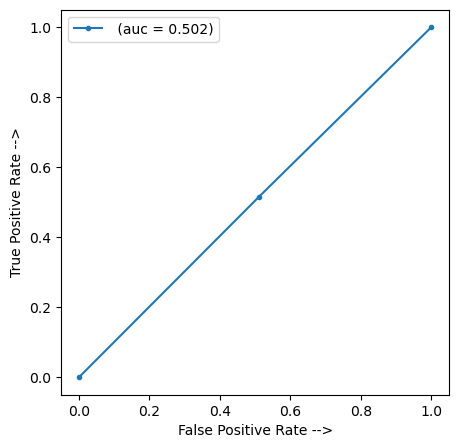

In [7]:
y_acutal = array[:, 0] # 0
y_pred = array[:,1] # 1

fpr, tpr, threshold = roc_curve(y_acutal, y_pred)
auc = auc(fpr,tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr,tpr, marker='.', label=' (auc = %0.3f)' % auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()